In [8]:
import numpy as np
import cv2

def rof_denoise(img,eps = 0.01,stride = 0.1,tv_weight = 30):
    m,n = img.shape
 
    #初始化
    U = img
    dual_x = img #对偶域的x分量
    dual_y = img #对偶域为y分量
    loss = 1
 
    while loss > eps :
        U0 = U
 
        #原始变量的梯度
        grad_x = cv2.Sobel(U,ddepth = -1,dx = 1,dy = 0) #变量U梯度的x分量
        grad_y = cv2.Sobel(U,ddepth = -1,dx = 0,dy = 1) #变量U梯度的y分量
        #更新对偶变量
        dual_x2 = dual_x + (stride / tv_weight) * grad_x
        dual_y2 = dual_y + (stride / tv_weight) * grad_y
        norm2 = np.maximum(1,np.sqrt(dual_x2 ** 2 + dual_y2 ** 2))
 
        dual_x = dual_x2 / norm2  #更新x分量（对偶）
        dual_y = dual_y2 / norm2  #更新y分量（对偶）
 
        #更新原始变量
        dual_x2 = np.roll(dual_x,1,axis = 1)    #对x分量进行向右x轴平移
        dual_y2 = np.roll(dual_y,1,axis = 0)    #对y分量进行向右y轴平移
 
        dual_div = (dual_x-dual_x2) + (dual_y - dual_y2) #对偶域的散度
        U = img + tv_weight * dual_div  #更新原始变量
 
        #更新误差
        loss = np.linalg.norm(U - U0) / np.sqrt(n * m)
 
    return U

(-0.5, 199.5, 199.5, -0.5)

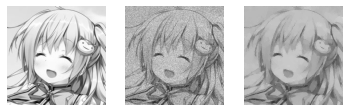

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure()
plt.gray()

#展示原图像
img = np.array(Image.open('1.jpg').convert('L'))
plt.subplot(1,3,1)
plt.imshow(img)
plt.axis("off")

#展示添加噪声后的图像
img = img + 30 * np.random.standard_normal(img.shape)
plt.subplot(1,3,2)
plt.imshow(img)
plt.axis("off")

#展示去噪结果
U = rof_denoise(img)
plt.subplot(1,3,3)
plt.imshow(U)
plt.axis("off")